<a href="https://colab.research.google.com/github/onmax/bike-forecasting/blob/main/src/models/one_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/onmax/bike-forecasting/
%cd bike-forecasting/src/models

In [ ]:
!pip3 install tensorflow keras livelossplot tensorboard pandas >> /dev/null

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [5]:
import pandas as pd
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

import os
import inspect
import sys

from window import WindowGenerator
from model_lib import compile_and_fit

sys.path.insert(1, '../preprocessing/')
sys.path.insert(1, '../graphs/')
from dataset_lib import load_dataset, split_dataset
from lr import lr_timeline

In [6]:
df = load_dataset()

Putting together /mnt/f/proyectos/bikes/src/models/../../data/files/../parts/chicago-divvy-trips-part-1
Putting together /mnt/f/proyectos/bikes/src/models/../../data/files/../parts/chicago-divvy-trips-part-2
Putting together /mnt/f/proyectos/bikes/src/models/../../data/files/../parts/chicago-divvy-trips-part-3


In [7]:
train_df, val_df = split_dataset(df, train_from=datetime(2018, 1, 1))

Loading only stations with the following id: [{'place': 'Dearborn St & Adams St', 'id': 37}]
Training from 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Validating from 2019-01-01 00:00:00 to 2019-12-31 23:00:00


In [5]:
train_df

,quantity_37,hour,day_of_week,month
start_time,,,,
2018-01-01 00:00:00,0.0,0,1,1
2018-01-01 01:00:00,0.0,1,1,1
2018-01-01 02:00:00,0.0,2,1,1
2018-01-01 03:00:00,0.0,3,1,1
2018-01-01 04:00:00,0.0,4,1,1
...,...,...,...,...
2018-12-31 19:00:00,0.0,19,1,12
2018-12-31 20:00:00,0.0,20,1,12
2018-12-31 21:00:00,0.0,21,1,12


In [9]:
input_width = 24
w1 = WindowGenerator(input_width=input_width, label_width=1, shift=1,
                        train_df=train_df, val_df=val_df)

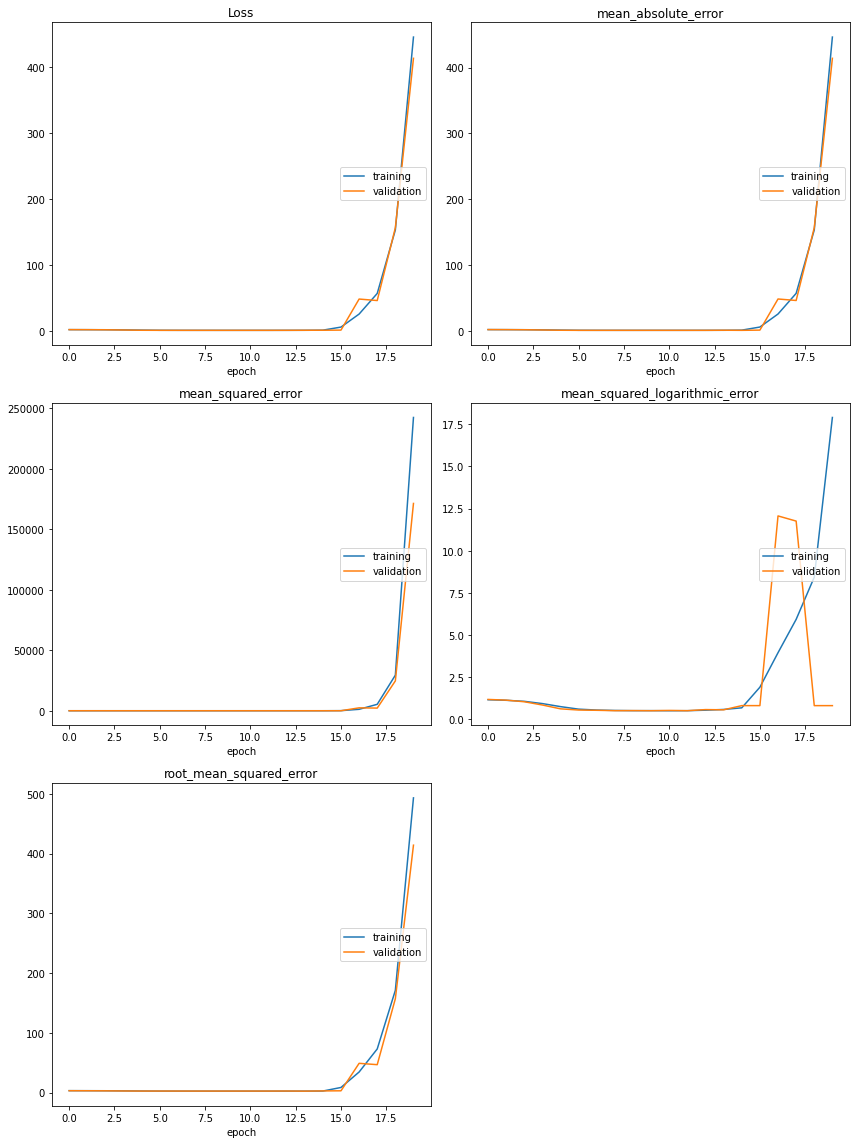

Loss
	training         	 (min:    1.022, max:  445.753, cur:  445.753)
	validation       	 (min:    1.026, max:  413.526, cur:  413.526)
mean_absolute_error
	training         	 (min:    1.436, max:  446.254, cur:  446.254)
	validation       	 (min:    1.422, max:  414.026, cur:  414.026)
mean_squared_error
	training         	 (min:    6.161, max: 242525.531, cur: 242525.531)
	validation       	 (min:    6.183, max: 171422.797, cur: 171422.797)
mean_squared_logarithmic_error
	training         	 (min:    0.514, max:   17.898, cur:   17.898)
	validation       	 (min:    0.516, max:   12.062, cur:    0.817)
root_mean_squared_error
	training         	 (min:    2.485, max:  493.174, cur:  493.174)
	validation       	 (min:    2.489, max:  414.033, cur:  414.033)
137/137 - 3s - loss: 445.7535 - mean_squared_logarithmic_error: 17.8983 - mean_squared_error: 242525.5312 - mean_absolute_error: 446.2535 - root_mean_squared_error: 493.1736 - val_loss: 413.5259 - val_mean_squared_logarithmic_error: 

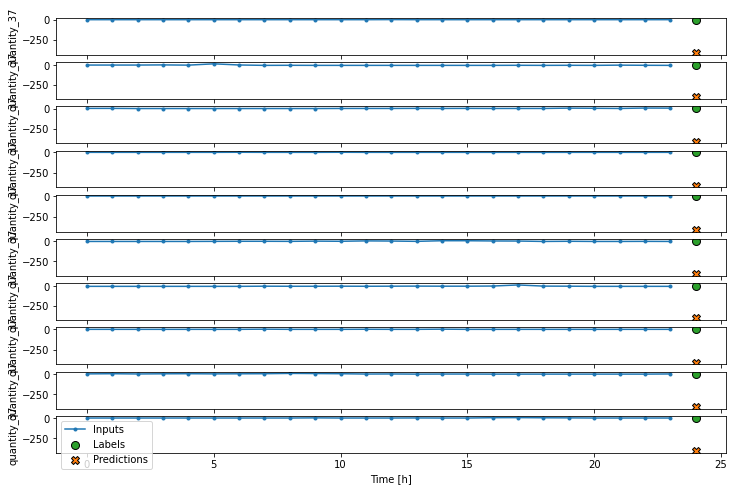

In [65]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    Dense(32, activation="relu", input_shape=[None, 24, 4]),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(1),
])
history = compile_and_fit(model, w1, should_stop=True, max_epochs=100, with_lr_schedule=True)

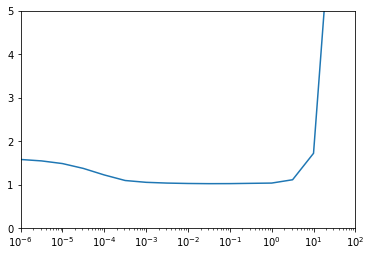

In [64]:
lr_timeline(history) 

In [8]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    Dense(32, activation="relu", input_shape=[None, 24, 4]),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(1),
])
history = compile_and_fit(model, w1, lr=0.1, should_stop=True, max_epochs=100, tensorboard=True)

NameError: name 'w1' is not defined